In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [8]:
data = MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

torch.Size([28, 28])


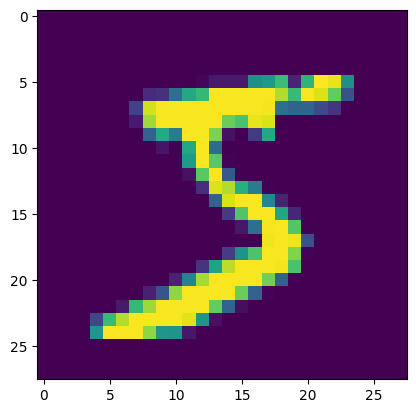

In [14]:
import matplotlib.pyplot as plt
print(data.data[0].shape)
plt.imshow(data.data[0])

#### sklearn and matplotlib

(64,)


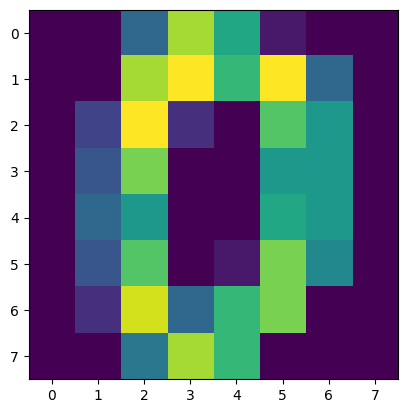

In [17]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)
print(X[0].shape)
plt.imshow(X[0].reshape(8,8))

#### Read image and convert to Tensor

In [20]:
# Import necessary libraries 
import torch 
from PIL import Image 
import torchvision.transforms as transforms 

path = "data/dog.jpeg"

In [25]:
# Read a PIL image 
image = Image.open(path).convert("RGB") 

# Define a transform to convert PIL 
# image to a Torch tensor 
transform = transforms.Compose([ 
    transforms.Resize([224, 224]),
	transforms.PILToTensor() 
]) 

# transform = transforms.PILToTensor() 
# Convert the PIL image to Torch tensor 
img_tensor = transform(image) 
print(img_tensor.shape)
# print the converted Torch tensor 
print(img_tensor) 


torch.Size([3, 224, 224])
tensor([[[166, 167, 167,  ..., 163, 163, 162],
         [166, 167, 167,  ..., 163, 163, 163],
         [166, 167, 167,  ..., 163, 163, 163],
         ...,
         [105, 103, 102,  ..., 123, 120, 120],
         [100, 101, 105,  ..., 121, 119, 119],
         [ 99, 100, 105,  ..., 119, 119, 120]],

        [[188, 189, 189,  ..., 184, 184, 183],
         [188, 189, 189,  ..., 184, 184, 184],
         [188, 189, 189,  ..., 184, 184, 184],
         ...,
         [125, 124, 126,  ..., 123, 115, 109],
         [122, 122, 127,  ..., 129, 124, 119],
         [121, 122, 127,  ..., 132, 128, 125]],

        [[123, 124, 124,  ..., 117, 117, 116],
         [123, 124, 124,  ..., 117, 117, 117],
         [123, 124, 124,  ..., 117, 117, 117],
         ...,
         [ 70,  67,  66,  ...,  68,  62,  58],
         [ 60,  62,  67,  ...,  73,  68,  66],
         [ 56,  59,  67,  ...,  76,  73,  72]]], dtype=torch.uint8)


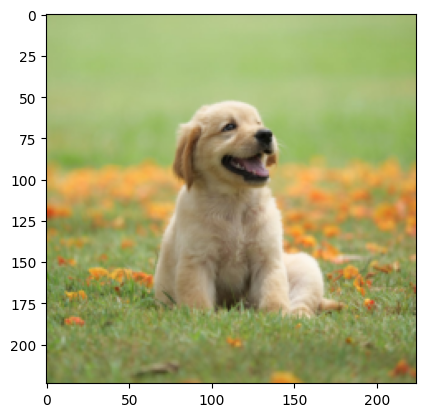

In [29]:
plt.imshow(img_tensor.permute(1, 2, 0))

In [37]:
import sys
!{sys.executable} -m pip install -q pydot


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Keras

In [45]:
from keras.applications.vgg16 import VGG16
#Load the model
model = VGG16()

In [46]:
from keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [47]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [48]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [49]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

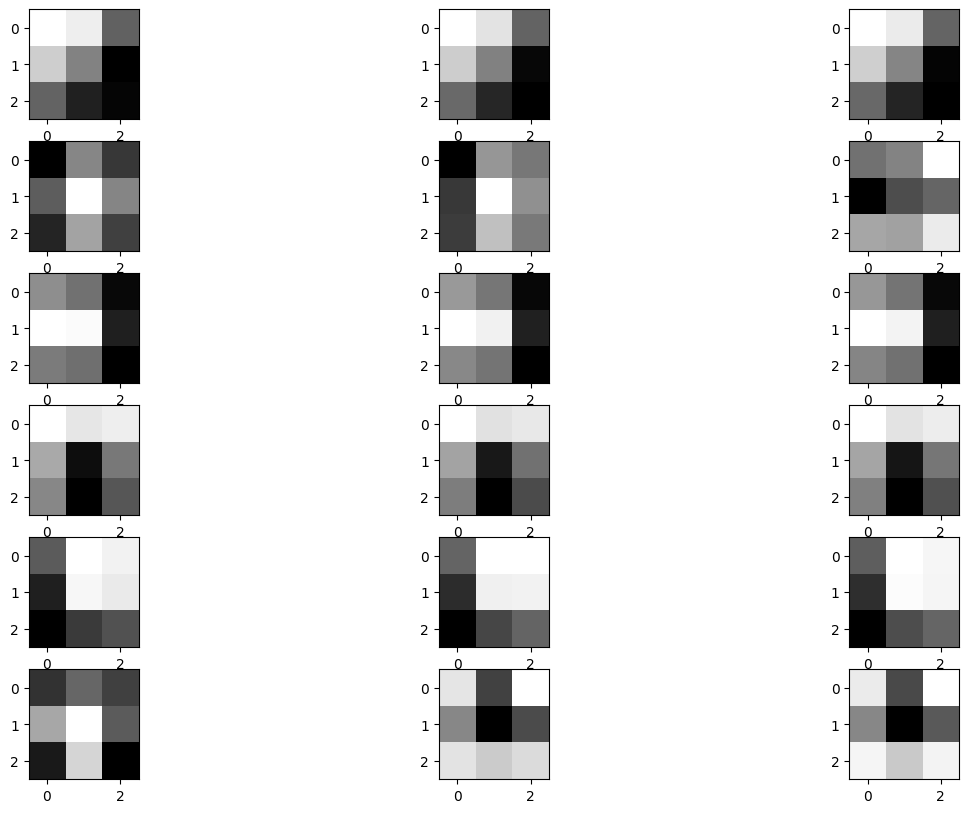

In [50]:
n_filters =6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

In [52]:
model = model(inputs=model.inputs)

In [ ]:
image = load_img("/content/kohli.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

image = preprocess_input(image)

In [ ]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()